<a href="https://colab.research.google.com/github/Rohit991371/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
pd.set_option('display.max_columns',None)
%matplotlib inline

In [ ]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [ ]:
df = data.copy()

In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Droping car_ID

In [ ]:
df.drop('car_ID', axis = 1, inplace = True)

In [ ]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Split "Car company" from CarName

In [ ]:
df[['company_name', 'car_model']] = df['CarName'].str.split(' ',n=1, expand=True)


1 in split(' ', 1, expand=True) specifies the maximum number of splits to be done.<br><br>
it means that the string will only be split at the first occurrence of the delimiter (in this case, the space ' ' or hyphen '-'), so the result will contain only two parts: the part before the first space and the part after the first space

In [ ]:
print(df[['company_name', 'car_model']])


    company_name     car_model
0    alfa-romero        giulia
1    alfa-romero       stelvio
2    alfa-romero  Quadrifoglio
3           audi        100 ls
4           audi         100ls
..           ...           ...
200        volvo     145e (sw)
201        volvo         144ea
202        volvo         244dl
203        volvo           246
204        volvo         264gl

[205 rows x 2 columns]


In [ ]:
df.drop("CarName",axis = 1, inplace = True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name,car_model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [ ]:
df['company_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
df.isnull().sum()

,0
symboling,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0
carlength,0
carwidth,0


In [ ]:
# Remove rows where 'car_model' is null
df.dropna(subset=['car_model'], inplace=True)


In [ ]:
df.isnull().sum()

,0
symboling,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0
carlength,0
carwidth,0


In [ ]:
# # Save the DataFrame to a CSV file
# df.to_csv('cleaned_car_data.csv', index=False)


Cleaning data

In [ ]:
df['drivewheel'] = df['drivewheel'].replace('4wd','fwd')

In [ ]:
df['company_name'] = df['company_name'].replace('maxda', 'mazda')

In [ ]:
df['company_name'] = df['company_name'].replace('Nissan', 'nissan')

In [ ]:
df['company_name'] = df['company_name'].replace('porcshce', 'porsche')

In [ ]:
df['company_name'] = df['company_name'].replace('toyouta', 'toyota')


In [ ]:
df['company_name'] = df['company_name'].replace('vokswagen', 'volkswagen')

In [ ]:
df['company_name'] = df['company_name'].replace('vw', 'volkswagen')

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('cleaned_car_data.csv', index=False)


Finding outliers in all numerical column using quantile method

In [ ]:
df_numeric = ['wheelbase','carlength','carwidth','carheight','curbweight',
                    'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']


In [ ]:
df.shape

(203, 26)

In [ ]:
for col in df_numeric:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  range_low = q1 - 1.5 * iqr
  range_upper = q3 + 1.5 * iqr
  df = df.loc[(df[col] > range_low) & (df[col] < range_upper)]

df.shape

(123, 26)

Checking Data Imbalance<br><br>
listing categorical columns for checking data imbalance and plotting them

In [ ]:
columns_list = df.columns.tolist()
print(columns_list)


['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'company_name', 'car_model']


In [ ]:
# List categorical columns
df_category = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", df_category)


Categorical Columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'company_name', 'car_model']


In [ ]:
# Assuming 'symboling' is the name of the column you want to add
df_category.append('symboling')

print("Updated Categorical Columns:", df_category)


Updated Categorical Columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'company_name', 'car_model', 'symboling']


In [ ]:
df_category

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company_name',
 'car_model',
 'symboling']

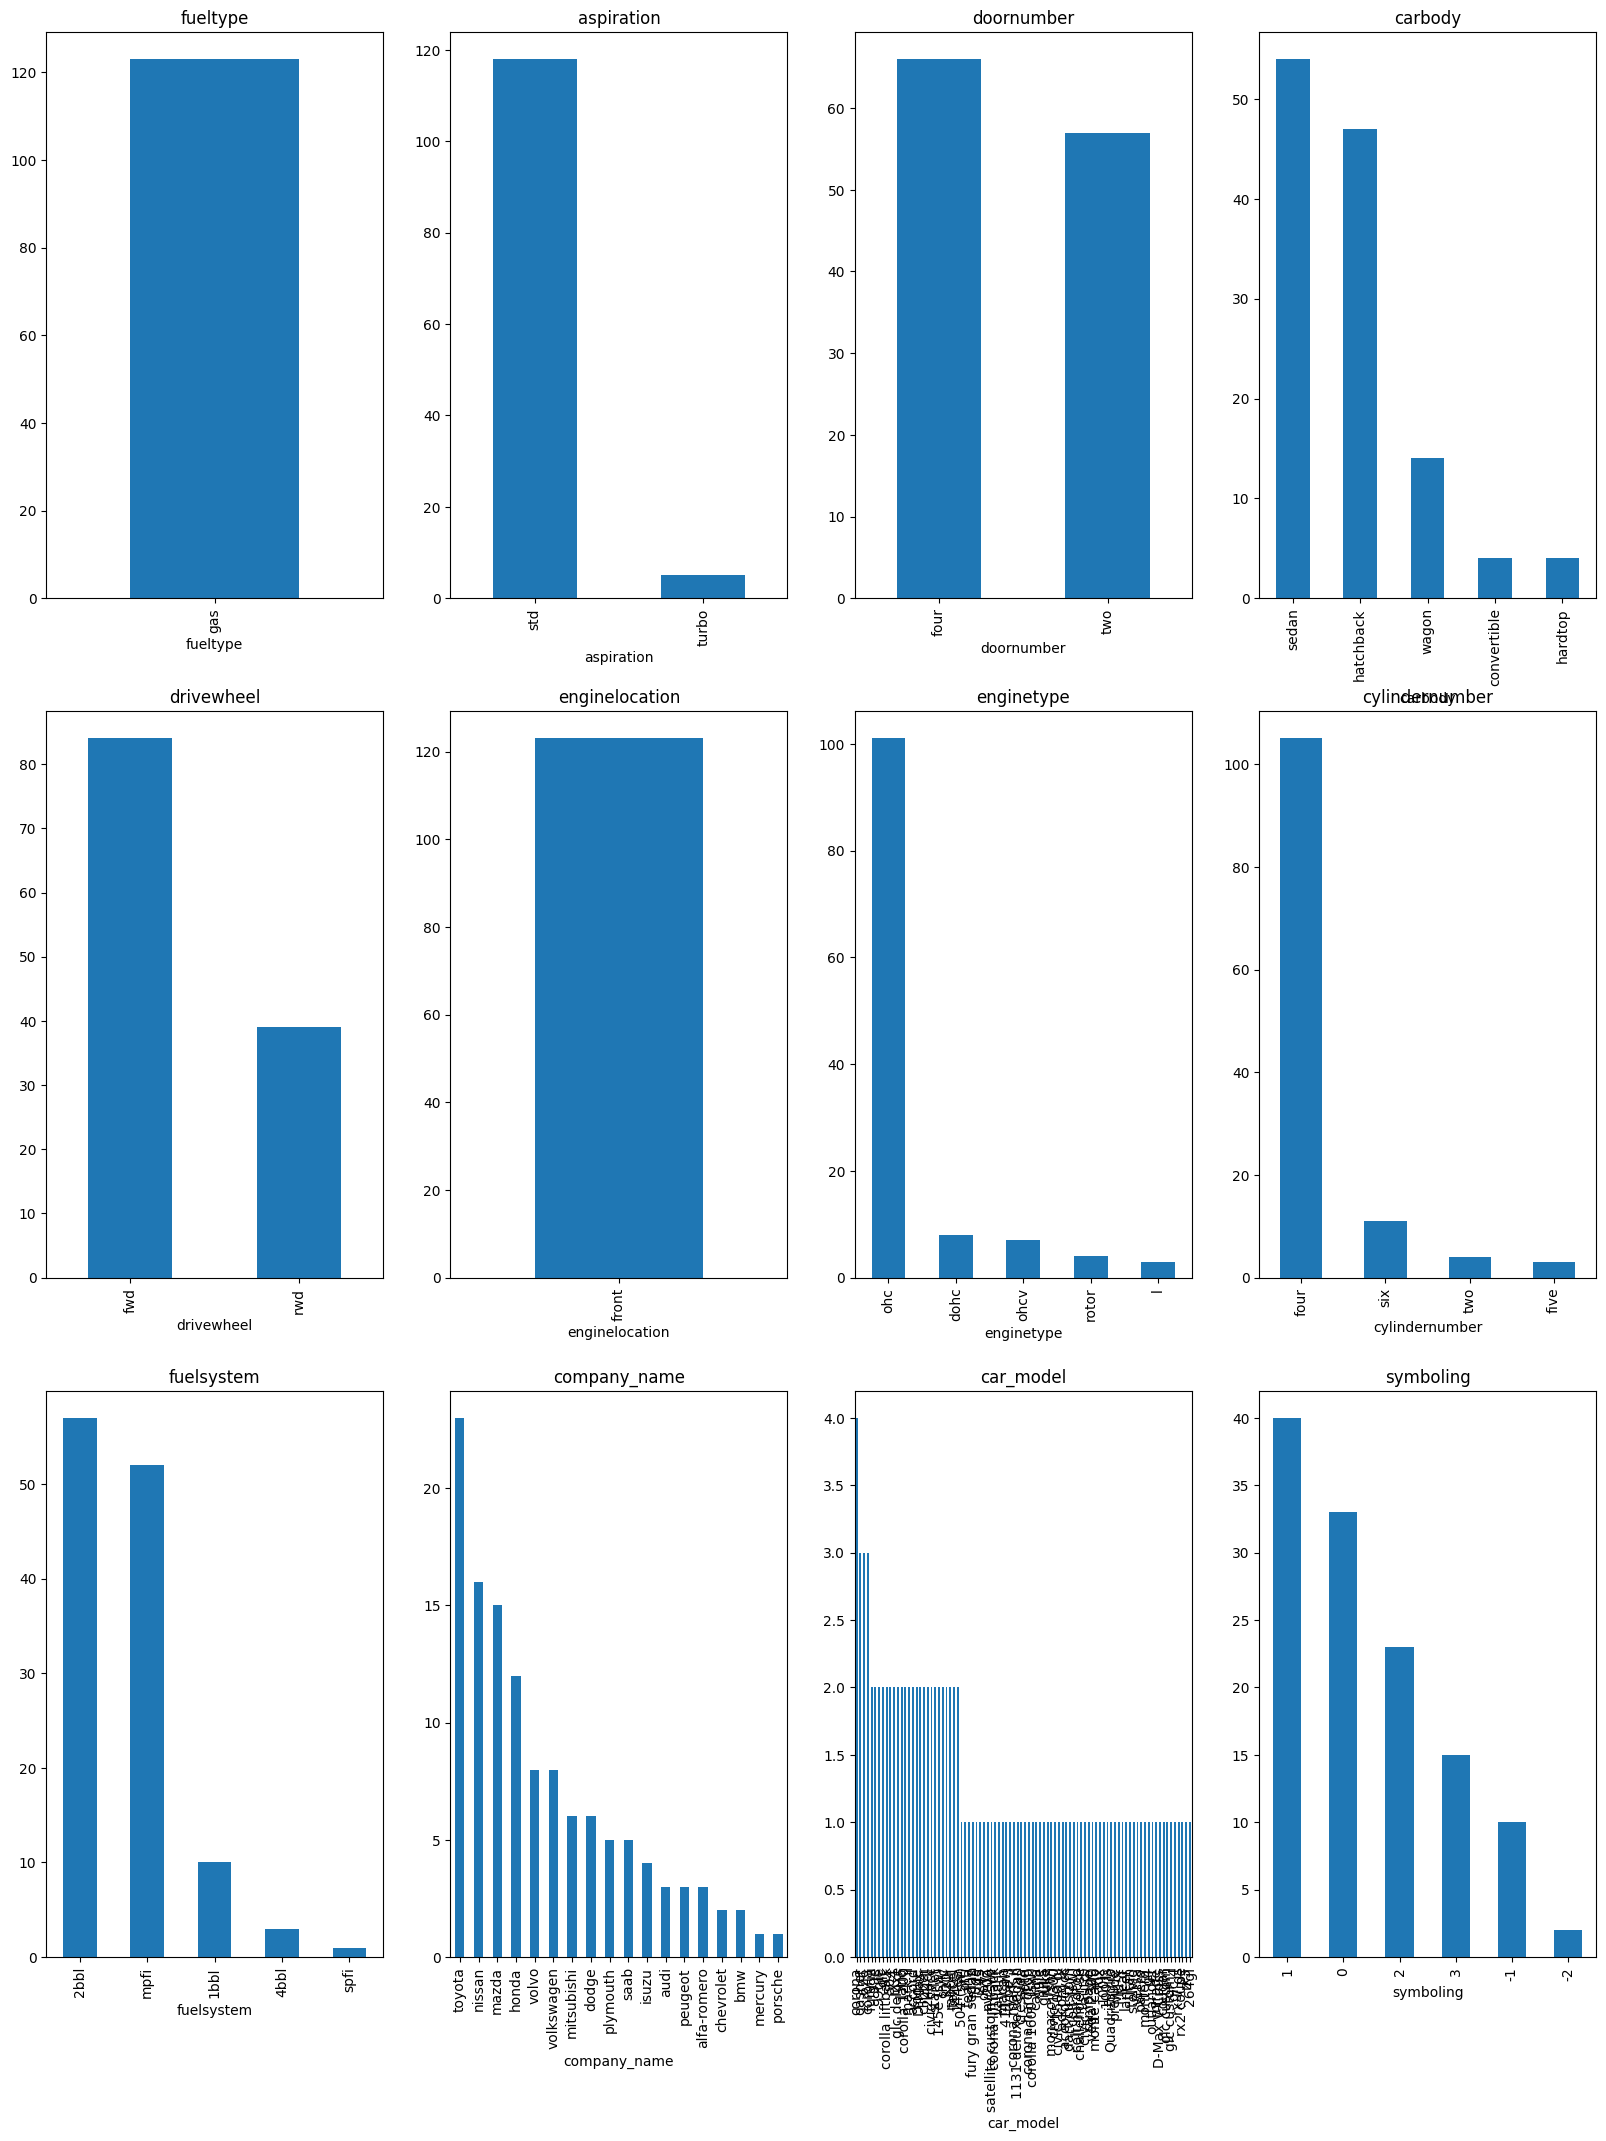

In [ ]:
plt.figure(figsize=(20,25))
k = 0
for col in df_category:
  k=k+1
  plt.subplot(3,4,k)
  df[col].value_counts().plot(kind='bar')
  plt.title(col)


visualising numerical data

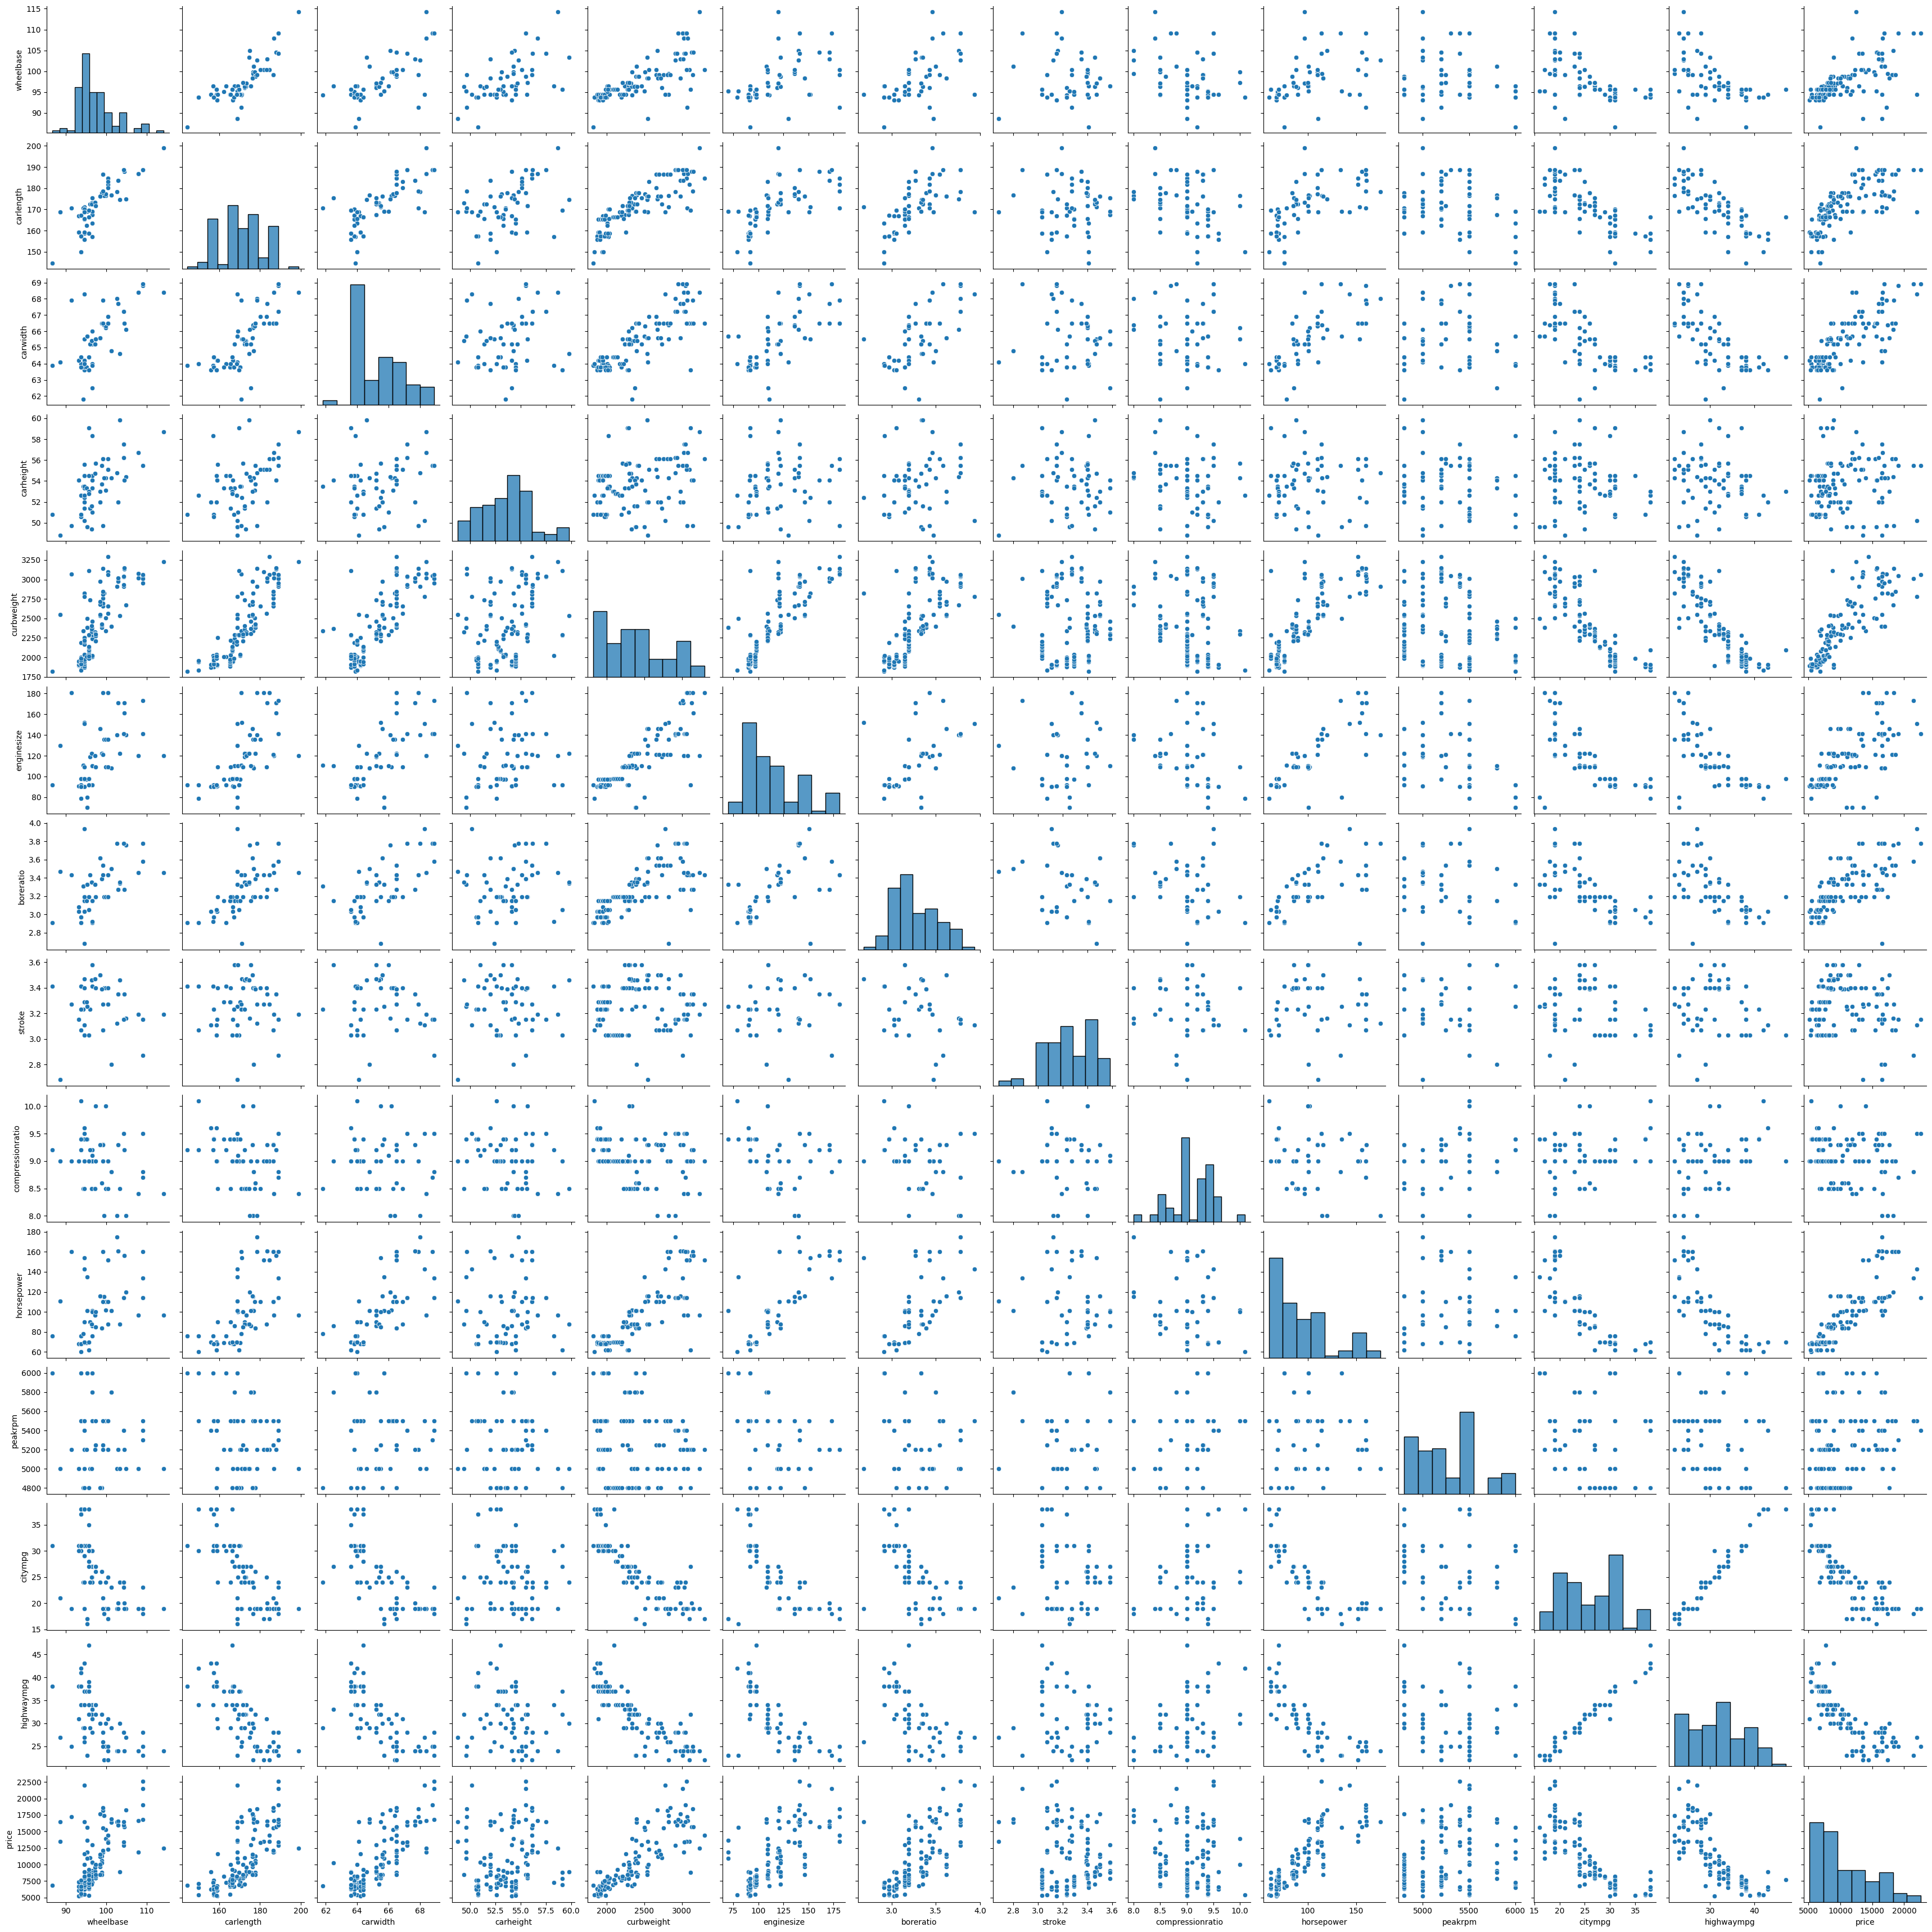

In [ ]:
sns.pairplot(df[df_numeric])

visualising categorical data

In [ ]:
# Remove 'company_name' and 'car_model' from df_category list

df_company_name = df_category.copy()
df_company_name.remove('company_name')
df_company_name.remove('car_model')

In [ ]:

k=0
plt.figure(figsize=(20,18))
for col in range(len(df_company_name)):
  k = k+1
  plt.subplot(4,3,k)
  ax = sns.boxplot(x= df_company_name[col], y='price',data = df)


In [ ]:
plt.figure(figsize=(20,18))
ax = sns.boxplot(x='company_name', y='price', data=df)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment = 'right')

Encoding the categorical Variable

Encoding the binary variables like (fueltype, aspiration, doornumber, drivewheel, enginelocation)


#fueltype

In [ ]:
df['fueltype'] = df['fueltype'].map({'gas':1, 'diesel': 0})
df.head()

aspiration




In [ ]:
df['aspiration'] = df['aspiration'].map({'std':1, 'turbo': 0})
df.head()

doornumber

In [ ]:
df['doornumber'] = df['doornumber'].map({'four':1, 'two': 0})
df.head()

drivewheel

In [ ]:
df['drivewheel'] = df['drivewheel'].map({'fwd':1, 'rwd': 0})
df.head()

enginelocation

In [ ]:
df['enginelocation'] = df['enginelocation'].map({'front':1, 'rear': 0})
df.head()

In [ ]:
df.head()

Encoding categorical variables with more than two levels using dummy variables
<br>
(symboling, carbody, enginetype, cylindernumber, fuelsystem,companyname)

symboling

In [ ]:
symboling_dummy = pd.get_dummies(df['symboling'], dtype=int)
symboling_dummy.head()

In [ ]:

symboling_dummy = symboling_dummy.rename(columns={-2:'symboling(-2)',-1:'symboling(-1)',0:'symboling(0)',1:'symboling(1)', 2:'symboling(2)',3:'symboling(3)'})


In [ ]:
symboling_dummy.head()

In [ ]:
#concating the dummy dataframe with original dataframe
df = pd.concat([df, symboling_dummy], axis = 1)
df.head()

In [ ]:
#Droping the 'symboling' column
df = df.drop('symboling', axis = 1)
df.head()

carbody

In [ ]:
carbody_dummy = pd.get_dummies(df['carbody'], dtype=int)
carbody_dummy.head()

In [ ]:
carbody_dummy = carbody_dummy.rename(columns = {'convertible': 'carbody(convertible)',
                                                'hardtop': 'carbody(hardtop)',
                                                'hatchback': 'carbody(hatchback)',
                                                 'sedan': 'carbody(sedan)',
                                                'wagon': 'carbody(wagon)'})
carbody_dummy.head()


In [ ]:
#concating the carbody_dummy
df = pd.concat([df, carbody_dummy], axis = 1)
df.head()

In [ ]:
#droping the carbody
df = df.drop('carbody',axis=1)
df.head()

enginetype


In [ ]:
enginetype_dummy = pd.get_dummies(df['enginetype'], dtype = int)
enginetype_dummy.head()

In [ ]:
enginetype_dummy = enginetype_dummy.rename(columns={'dohc': 'enginetype(dohc)',
                                                    'l': 'enginetype(l)',
                                                    'ohc': 'enginetype(ohc)',
                                                    'ohcv': 'enginetype(ohcv)',
                                                    'rotor': 'enginetype(rotor)'})

enginetype_dummy.head()

In [ ]:
#concating the enginetype_dummy with the original dataframe
df = pd.concat([df, enginetype_dummy], axis=1)
df.head()

In [ ]:
#droping the 'enginetype'
df = df.drop('enginetype',axis = 1)
df.head()

cylindernumber

In [ ]:
cylindernumber_dummy = pd.get_dummies(df['cylindernumber'], dtype=int)
cylindernumber_dummy.head()

In [ ]:

cylindernumber_dummy = cylindernumber_dummy.rename(columns={'five':'cylindernumber(five)',
                                                            'four':'cylindernumber(four)',
                                                            'six':'cylindernumber(six)',
                                                            'two':'cylindernumber(two)'})
cylindernumber_dummy.head()


In [ ]:
df = pd.concat([df, cylindernumber_dummy], axis = 1)
df.head()

In [ ]:
df = df.drop('cylindernumber', axis = 1)
df.head()

fuelsystem

In [ ]:
fuelsystem_dummy = pd.get_dummies(df['fuelsystem'],dtype=int)
fuelsystem_dummy.head()

In [ ]:

fuelsystem_dummy = fuelsystem_dummy.rename(columns={'1bbl': 'fuelsystem(1bbl)',
                                                    '2bbl': 'fuelsystem(2bbl)',
                                                    '4bbl': 'fuelsystem(4bbl)',
                                                    'mpfi': 'fuelsystem(mpfi)',
                                                    'spfi': 'fuelsystem(spfi)'
                                                    })
fuelsystem_dummy.head()



In [ ]:
df = pd.concat([df, fuelsystem_dummy],axis=1)
df.head()

In [ ]:
df = df.drop('fuelsystem',axis = 1)
df.head()

company_name



In [ ]:
company_name_dummy = pd.get_dummies(df['company_name'], dtype=int)
company_name_dummy.head()

In [ ]:

company_name_dummy = company_name_dummy.rename(columns= {'alfa-romero':'company_name(alfa-romero)',
                                                        'audi':'company_name(audi)',
                                                         'bmw':'company_name(bmw)',
                                                         'chevrolet':'company_name(chevrolet)',
                                                         'dodge':'company_name(dodge)',
                                                         'honda':'company_name(honda)',
                                                         'isuzu':'company_name(isuzu)',
                                                         'mazda':'company_name(mazda)',
                                                         'mercury':'company_name(mercury)',
                                                         'mitsubishi':'company_name(mitsubishi)',
                                                         'nissan':'company_name(nissan)',
                                                         'peugeot':'company_name(peugeot)',
                                                         'plymouth':'company_name(plymouth)',
                                                         'porsche':'company_name(porsche)',
                                                         'saab':'company_name(saab)',
                                                         'toyota':'company_name(toyota)',
                                                         'volkswagen':'company_name(volkswagen)',
                                                         'volvo':'company_name(volvo)',
                                                         })
company_name_dummy.head()


In [ ]:
df = pd.concat([df, company_name_dummy],axis=1)
df.head()

In [ ]:
df = df.drop('company_name',axis=1)
df.head()

In [ ]:
df.info()

In [ ]:
df = df.drop('car_model',axis =1)


Train Test split

Training the model


In [ ]:
# y = df.pop('price')
# x = df

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

In [ ]:
# #creating the model
# model = LinearRegression()
# model.fit(x_train, y_train)

In [ ]:
# model_predict = model.predict(x_test)

In [ ]:
# results_df = pd.DataFrame({'Actual': y_test, 'Predicted': model_predict})
# print(results_df)

In [ ]:
# print("Coefficients : \n",model.coef_)
# print("Intercept : \n", model.intercept_)
# print("Mean squared error : %.2f", mean_squared_error(y_test, model_predict))
# print("Variance score : %.2f", r2_score(y_test, model_predict))

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np

# # Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, model_predict)
# print(f"Mean Squared Error: {mse}")

# # Root Mean Squared Error (RMSE)
# rmse = np.sqrt(mse)
# print(f"Root Mean Squared Error: {rmse}")

# # Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_test, model_predict)
# print(f"Mean Absolute Error: {mae}")

# # R-squared (R2) Score
# r2 = r2_score(y_test, model_predict)
# print(f"R-squared Score: {r2}")

In [ ]:
# from sklearn.model_selection import cross_val_score

# # Assuming 'model' is your trained model and 'X' and 'y' are your full dataset
# cv_scores = cross_val_score(model, x, y, cv=5)  # 5-fold cross-validation
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean CV score: {cv_scores.mean()}")

In [ ]:
df_train, df_test = train_test_split(df, train_size=0.8, random_state=100)
print(df_train.shape)
print(df_test.shape)

In [ ]:
df_numeric

In [ ]:
scaler = MinMaxScaler()
df_train[df_numeric] = scaler.fit_transform(df_train[df_numeric])
df_train.head()

In [ ]:
# #checking correlation coefficient of all numerical
# plt.figure(figsize=(20,18))
# sns.heatmap(df_train[df_numeric].corr(), annot=True)
# plt.show()

In [ ]:
# Popping 'price' column for y_train
y_train = df_train.pop('price')
x_train = df_train

In [ ]:
#creating the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# (Recursive Feature Elimination)

In [ ]:
# RFE with the number of variables 20. It will select top 20 features.
from sklearn.feature_selection import RFE

rfe = RFE(estimator=model, n_features_to_select=20)

# Fit RFE on the training data
rfe = rfe.fit(x_train, y_train)


In [ ]:
# Listing the feature variables with their RFE status and rank
list(zip(x_train.columns, rfe.support_, rfe.ranking_))


[('fueltype', False, 42),
 ('aspiration', False, 8),
 ('doornumber', False, 28),
 ('drivewheel', False, 5),
 ('enginelocation', False, 41),
 ('wheelbase', True, 1),
 ('carlength', False, 13),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', True, 1),
 ('horsepower', False, 7),
 ('peakrpm', False, 34),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('symboling(-2)', False, 40),
 ('symboling(-1)', False, 39),
 ('symboling(0)', False, 32),
 ('symboling(1)', False, 19),
 ('symboling(2)', False, 31),
 ('symboling(3)', False, 29),
 ('carbody(convertible)', True, 1),
 ('carbody(hardtop)', False, 11),
 ('carbody(hatchback)', False, 24),
 ('carbody(sedan)', False, 25),
 ('carbody(wagon)', False, 36),
 ('enginetype(dohc)', True, 1),
 ('enginetype(l)', True, 1),
 ('enginetype(ohc)', False, 27),
 ('enginetype(ohcv)', True, 1),
 ('enginetype(rotor)', True, 1),
 ('cylindernu

In [ ]:
# The top 20 features selected by the RFE
rfe_cols = x_train.columns[rfe.support_]
rfe_cols

Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'compressionratio', 'citympg', 'highwaympg', 'carbody(convertible)',
       'enginetype(dohc)', 'enginetype(l)', 'enginetype(ohcv)',
       'enginetype(rotor)', 'cylindernumber(four)', 'cylindernumber(two)',
       'fuelsystem(mpfi)', 'company_name(isuzu)', 'company_name(peugeot)',
       'company_name(porsche)', 'company_name(volkswagen)'],
      dtype='object')

In [ ]:
# Not selected features by RFE
x_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation',
       'carlength', 'carheight', 'stroke', 'horsepower', 'peakrpm',
       'symboling(-2)', 'symboling(-1)', 'symboling(0)', 'symboling(1)',
       'symboling(2)', 'symboling(3)', 'carbody(hardtop)',
       'carbody(hatchback)', 'carbody(sedan)', 'carbody(wagon)',
       'enginetype(ohc)', 'cylindernumber(five)', 'cylindernumber(six)',
       'fuelsystem(1bbl)', 'fuelsystem(2bbl)', 'fuelsystem(4bbl)',
       'fuelsystem(spfi)', 'company_name(alfa-romero)', 'company_name(audi)',
       'company_name(bmw)', 'company_name(chevrolet)', 'company_name(dodge)',
       'company_name(honda)', 'company_name(mazda)', 'company_name(mercury)',
       'company_name(mitsubishi)', 'company_name(nissan)',
       'company_name(plymouth)', 'company_name(saab)', 'company_name(toyota)',
       'company_name(volvo)'],
      dtype='object')

In [ ]:
x_train_1 = x_train[rfe_cols]
x_train_1.head()

,wheelbase,carwidth,curbweight,enginesize,boreratio,compressionratio,citympg,highwaympg,carbody(convertible),enginetype(dohc),enginetype(l),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(two),fuelsystem(mpfi),company_name(isuzu),company_name(peugeot),company_name(porsche),company_name(volkswagen)
64,0.442029,0.547170,0.410291,0.468468,0.563492,0.285714,0.454545,0.40,0,0,0,0,0,1,0,0,0,0,0,0
55,0.315217,0.396226,0.379824,0.000000,0.515873,0.666667,0.045455,0.04,0,0,0,0,1,0,1,0,0,0,0,0
65,0.663043,0.471698,0.576168,0.630631,0.857143,0.000000,0.136364,0.20,0,0,0,0,0,1,0,1,0,0,0,0
154,0.329710,0.000000,0.318890,0.198198,0.293651,0.476190,0.500000,0.40,0,0,0,0,0,1,0,0,0,0,0,0
191,0.500000,0.622642,0.570074,0.594595,0.404762,0.238095,0.136364,0.08,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
# Adding constant because statsmodel library doesn't include the intercept by default.
x_train_sm_1 = sm.add_constant(x_train_1)


In [ ]:
# Creating model
model_1 = sm.OLS(y_train, x_train_sm_1)


In [ ]:
# Fit the model
model_lr_1 = model_1.fit()


In [ ]:
print(model_lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     56.51
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           1.46e-37
Time:                        21:25:32   Log-Likelihood:                 125.19
No. Observations:                  98   AIC:                            -212.4
Df Residuals:                      79   BIC:                            -163.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   